<a href="https://colab.research.google.com/github/KpihX/rocket-durability-ai/blob/main/ML_DL_NASA_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#023F7C> **Machine Learning and Deep Learning**

---



<font color=#023F7C>**Hi! PARIS DataBootcamp 2024 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >


**Members**
- **Name**: KAMDEM Ivann           <br>
  **School**: Ecole polytechnique        <br>
  **Track**: Intermediate           <br>
- **Name**: WU Jinyang           <br>
  **School**: Ecole Polytechnique         <br>
  **Track**: Beginner           <br>
- **Name**: Montandon Tanguy          <br>
  **School**:  HEC Paris         <br>
  **Track**: beginner           <br>
- **Name**: Moubareckou Mohamed          <br>
  **School**: Ecole polytechnique         <br>
  **Track**: Beginner           <br>
- **Name**: Picq Pierre           <br>
  **School**: HEC Paris         <br>
  **Track**: Beginner           <br>
- **Name**: Blackwell-Hunt Derrick        <br>
  **School**: HEC Paris         <br>
  **Track**: Intermediate           <br>
- **Name**: Civilo Yigit        <br>
  **School**: HEC Paris         <br>
  **Track**: Intermediate           <br>

**Group number**: 30    <br>
**Teaching Assistants**: Thibault Porssut and Farouk Kadri, Machine Learning Research Engineer @ Hi! PARIS

# **1. Important guidelines**


The RUL (Remaining Useful Life) refers to the remaining lifespan of an aircraft engine before failure. In the context of the NASA C-MAPSS dataset, this term represents the number of operational cycles an engine can still perform before breaking down. **The goal of this practical session** is to build a Machine Learning model that can p**redict this value using sensor data collected during previous cycles.**

To achieve this goal, you are provided with three datasets: train_FD001.txt, test_FD001.txt, and RUL_FD001.txt, originating from the NASA C-MAPSS dataset. <br>
These datasets contain sensor measurements and operational settings for multiple aircraft engines recorded over a series of operational cycles. Each engine is run until it fails, and the sensor data capture the degradation process over time. <br>
The file RUL_FD001.txt contains the actual Remaining Useful Life (RUL) values for the engines in the test set at the point where the test data end.

The variable to predict is RUL, which represents the number of operational cycles remaining before the engine fails.

**<font size='5'><u>How to work on this notebook</u>**</font> <br>
The notebook is split in two parts: Machine Learning and Deep Learning.

- **Beginner track**: You only have to complete the Machine Learning and Deeep Learning section.
- **Intermediate track**: Please complete Machine Learning, Deep Learning and the optional section.

**<font size='5'><u>Bootcamp deliverables</u>**</font> <br>

Here are the two deadlines for the bootcamp deliverables:
- <u>**Friday 12:30 PM**</u>: <br> Send us the "Machine Learning and Deep Learning" notebooks (no need to send us data cleaning) <br>
    - **Each group member should send his own notebooks** (we won't accept one notebook per group)
    - Don't forget to complete the start of the notebook with your information (name, school, group number and track)
    
- <u>**Friday 2:30PM**</u>: <br>Send us the group slides <br>
    - You can send us a single powerpoint per group (no need to send us one per group member)
    - Don't forget to add your group number as well as who is in your group (name, school and track) to the slides

Send both the notebooks and the slides at `data-event@hi-paris.fr`

**<font size='5'><u>Need help ? 🙏</u>**</font> <br>

We will drop later in the week to the Machine Learning course (Beginner track) on HFactory the `Machine_Learning_Beginner_DB2025.ipynb` notebook for those who need help with the Machine Learning part.

**Don't hesitate to ask questions to the bootcamp organizers/staff members if you need help.**


# **2. Machine Learning**

Let's start by importing the libraries needed for this notebook.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [10]:
import os
from google.colab import drive

drive.mount('/content/drive/')
os.chdir("/content/drive/Othercomputers/My laptop/OneDrive - Ecole Polytechnique/X/Hi_AI_2025/Project/ML_DL")
os.listdir()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['02_df_train_FD001_wo_nan_denoised.csv',
 '02_df_test_FD001_wo_nan_denoised.csv',
 'ML_DL_NASA_2025.ipynb',
 'ML_DL_NASA_2025_Optimised.ipynb']

Now load the train and test datasets using `pd.read_csv()`

In [11]:
train_path =  '02_df_train_FD001_wo_nan_denoised.csv'
test_path = '02_df_test_FD001_wo_nan_denoised.csv'

# Train and test data.
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (18816, 28)
Test shape: (12039, 28)


### **2.1 Data preprocessing**

In [12]:
# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [13]:
def replace_with_gaussian_bins(df, cols):
    """
    Replace numerical columns with 7-category Gaussian bins based on mean ± n*std.

    Parameters:
    df   : DataFrame
    cols : list of column names to transform

    Returns:
    DataFrame with the same structure but selected numeric columns replaced with categorical bins
    """
    df_out = df.copy()

    labels = [
        "Extremely Low",
        "Very Low",
        "Low",
        "Normal",
        "High",
        "Very High",
        "Extremely High"
    ]

    for col in cols:
        mu = df_out[col].mean()
        sigma = df_out[col].std()

        bins = [
          -np.inf,
          mu - 2*sigma,   # Extremely Low
          mu - 1*sigma,   # Very Low
          mu - 0.5*sigma,   # Low
          mu + 0.5*sigma,   # High
          mu + 1*sigma,   # Very High
          mu + 2*sigma,   # Extremely High
          np.inf
      ]

        df_out[col] = pd.cut(df_out[col], bins=bins, labels=labels, include_lowest=True)

    return df_out

In [14]:
train_df=replace_with_gaussian_bins(train_df,["HPC outlet temperature (°C)"])
test_df=replace_with_gaussian_bins(test_df,["HPC outlet temperature (°C)"])
train_df.head()

,engine_unit_number,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (°C),LPC outlet temperature (°C),HPC outlet temperature (°C),LPT outlet temperature (°C),Fan inlet pressure (bar),...,Corrected core speed (rpm),Bypass ratio (dimensionless),"Burner fuel-air ratio (mass ratio, dimensionless)",Bleed enthalpy (kJ/kg),Demanded fan speed (rpm),Demanded corrected fan speed (rpm),HPT coolant bleed flow (kg/s),LPT coolant bleed flow (kg/s),RUL,RUL_class
0,1,1,-0.0007,-0.0004,100.0,15.0,83.416667,Normal,504.961111,1.008014,...,8138.62,8.4195,0.03,392.0,2388,100.0,17.717318,10.622680,191,0
1,1,2,0.0019,-0.0003,100.0,15.0,83.600000,Normal,506.372222,1.008014,...,8131.49,8.4318,0.03,392.0,2388,100.0,17.690102,10.624766,190,0
2,1,3,-0.0043,0.0003,100.0,15.0,83.711111,Normal,506.961111,1.008014,...,8133.23,8.4178,0.03,390.0,2388,100.0,17.667423,10.588751,189,0
3,1,4,0.0007,0.0000,100.0,15.0,83.711111,Very Low,505.666667,1.008014,...,8133.83,8.3682,0.03,392.0,2388,100.0,17.635671,10.602223,188,0
4,1,5,-0.0019,-0.0002,100.0,15.0,83.722222,Normal,508.083333,1.008014,...,8133.80,8.4294,0.03,393.0,2388,100.0,17.644743,10.616057,187,0


In [15]:


features = ['engine_unit_number',
  'time_cycles',
  'LPC outlet temperature (°C)',
  "HPC outlet temperature (°C)",
  "LPT outlet temperature (°C)",
  "HPC outlet pressure (bar)",
  "Physical core speed (rpm)",
  "Fuel flow / Ps30 (kg/s/bar)",
  "Corrected fan speed (rpm)",
  "Bypass ratio (dimensionless)",
  "Bleed enthalpy (kJ/kg)",
  "HPT coolant bleed flow (kg/s)"]



X_train = train_df[features].copy()
y_train = train_df["RUL_class"].copy()

X_test = test_df[features].copy()
y_test = test_df["RUL_class"].copy()


print("Train rows:", X_train.shape[0], "Test engines:", X_test.shape[0])

Train rows: 18816 Test engines: 12039


**<u>Question 2.1.1:</u>** <br>**Transform the categorical variables in each split with `OneHotEncoder`.** <br>


The column names OneHotEncoder creates can be accessed with `.get_feature_names_out()`. <br>
Go this [page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for more info on how to use scikit-learn's `OneHotEncoder` function. <br>

*Don't forget, data preprocessing is only applied to the feature variables in the case of binary classification !*


In [16]:
categorical_features = ["HPC outlet temperature (°C)"]
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder to the training data and transform it.
ohe_train_transformed = ohe.fit_transform(X_train[categorical_features])

# Get the names for the new columns from the encoder.
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Create a new DataFrame with the encoded features, preserving the original index.
X_train_ohe = pd.DataFrame(ohe_train_transformed, columns=ohe_feature_names, index=X_train.index)

# Remove the original categorical column and add the new encoded columns.
X_train_processed = pd.concat([X_train.drop(columns=categorical_features), X_train_ohe], axis=1)

# Transform the test data using the already-fitted encoder.
ohe_test_transformed = ohe.transform(X_test[categorical_features])

# Create a DataFrame for the test set's new encoded features.
X_test_ohe = pd.DataFrame(ohe_test_transformed, columns=ohe_feature_names, index=X_test.index)

# Combine the numerical features with the encoded features for the test set.
X_test_processed = pd.concat([X_test.drop(columns=categorical_features), X_test_ohe], axis=1)

# Display the results.
print("Processed Training Data Head:")
print(X_train_processed.head())
print("\nProcessed Training Data Shape:")
print(X_train_processed.shape)
print("\nProcessed Test Data Head:")
print(X_test_processed.head())
print("\nProcessed Test Data Shape:")
print(X_test_processed.shape)


Processed Training Data Head:
   engine_unit_number  time_cycles  LPC outlet temperature (°C)  \
0                   1            1                    83.416667   
1                   1            2                    83.600000   
2                   1            3                    83.711111   
3                   1            4                    83.711111   
4                   1            5                    83.722222   

   LPT outlet temperature (°C)  HPC outlet pressure (bar)  \
0                   504.961111                  38.221777   
1                   506.372222                  38.179719   
2                   506.961111                  38.214882   
3                   505.666667                  38.227982   
4                   508.083333                  38.196955   

   Physical core speed (rpm)  Fuel flow / Ps30 (kg/s/bar)  \
0                    9046.19                    35.967191   
1                    9044.07                    36.009938   
2                

However label encoding is preferred over one-hot encoding for ordinal labels because ordinal features have a meaningful, intrinsic order (e.g., Low < Medium < High). Label encoding preserves this natural ranking by mapping categories to integers that reflect their order, allowing models to interpret the progression between categories. In contrast, one-hot encoding would treat each category as unrelated, discarding the ordinal relationship and increasing the number of features unnecessarily, which can reduce efficiency without adding value.

**<u>Question 2.1.2:</u>** <br>**Transform the categorical variables with `LabelEncoder`.** <br>


The column names LabelEncoder creates can be accessed with `.get_feature_names_out()`. <br>
Go this [page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) for more info on how to use scikit-learn's `LabelEncoder` function. <br>

*Don't forget, data preprocessing is only applied to the feature variables in the case of binary classification !*

In [17]:
categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Initialize the LabelEncoder.
le = LabelEncoder()

# Fit the encoder to the training data and transform it.
X_train_le = le.fit_transform(X_train[categorical_cols])
# Transform the test data using the already-fitted encoder.
X_test_le = le.transform(X_test[categorical_cols])

X_train_le = pd.DataFrame(X_train_le, columns=categorical_cols)
X_test_le = pd.DataFrame(X_test_le, columns=categorical_cols)

# Display the results to show the transformation.
print("Processed Training Data with LabelEncoder (Head):")
print(X_train_le.head())
print("\nShape of Processed Training Data:")
print(X_train_le.shape)

print("\nProcessed Test Data with LabelEncoder (Head):")
print(X_test_le.head())
print("\nShape of Processed Test Data:")
print(X_test_le.shape)

Categorical columns: ['HPC outlet temperature (°C)']
Processed Training Data with LabelEncoder (Head):
   HPC outlet temperature (°C)
0                            4
1                            4
2                            4
3                            6
4                            4

Shape of Processed Training Data:
(18816, 1)

Processed Test Data with LabelEncoder (Head):
   HPC outlet temperature (°C)
0                            3
1                            4
2                            4
3                            3
4                            4

Shape of Processed Test Data:
(12039, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [18]:
# Display the mapping between original categories and encoded numerical values
print("Mapping of categories to numerical values:")
for i, category in enumerate(le.classes_):
    print(f"{category}: {i}")

Mapping of categories to numerical values:
Extremely High: 0
Extremely Low: 1
High: 2
Low: 3
Normal: 4
Very High: 5
Very Low: 6


The order obtained doesn't follow strictly the natural order (It's rather the alphabetic one). We'll go for a more natural way to encode this categorical feature

In [19]:
# We'll use a manual mapping first,because the category is ordinal(or we can just use OrdinalEncoder to begin with)
# The default encoding for LabelEncoder uses alphabetical sorting which would give close encoding both to "Extremeley Low" and "Extremely High"
# Now to use manual encoding that takes into account temperature order
# Create copies of the original dataframes to work with.
X_train_manual = X_train.copy()
X_test_manual = X_test.copy()

# Define the explicit order of the categories from lowest to highest.
temperature_mapping = {
    "Extremely Low": 0,
    "Very Low": 1,
    "Low": 2,
    "Normal": 3,
    "High": 4,
    "Very High": 5,
    "Extremely High": 6
}

# The categorical column to be transformed.

# Apply the custom mapping to the column in both the training and test sets.
for col in categorical_cols:
    X_train_manual[col] = X_train_manual[col].map(temperature_mapping)
    X_test_manual[col] = X_test_manual[col].map(temperature_mapping)

# Display the results to verify the manual encoding.
print("Processed Training Data with Manual Encoding (Head):")
print(X_train_manual.head())
print("\nShape of Processed Training Data:")
print(X_train_manual.shape)

print("\nProcessed Test Data with Manual Encoding (Head):")
print(X_test_manual.head())
print("\nShape of Processed Test Data:")
print(X_test_manual.shape)

Processed Training Data with Manual Encoding (Head):
   engine_unit_number  time_cycles  LPC outlet temperature (°C)  \
0                   1            1                    83.416667   
1                   1            2                    83.600000   
2                   1            3                    83.711111   
3                   1            4                    83.711111   
4                   1            5                    83.722222   

  HPC outlet temperature (°C)  LPT outlet temperature (°C)  \
0                           3                   504.961111   
1                           3                   506.372222   
2                           3                   506.961111   
3                           1                   505.666667   
4                           3                   508.083333   

   HPC outlet pressure (bar)  Physical core speed (rpm)  \
0                  38.221777                    9046.19   
1                  38.179719                    9044.

Remark: The mapping is not following perfectly the natural order. We'll go for something else

**<u>Question 2.1.3</u>**: <br>
**Scale the continuous variables using either `StandardScaler` (standardization) or `MinMaxScaler` (normalization).**<br>





In [20]:
# HPC is exempted from scaling because we're counting it as categorical and not continuous in our case
# Use the categorical_cols defined earlier to exclude them from continuous features
continuous_features = [col for col in X_train_manual.columns if col not in categorical_cols]

# --- Method 1: StandardScaler ---
# Create a copy to store the standardized data.
X_train_scaled = X_train_manual.copy()
X_test_scaled = X_test_manual.copy()

# Initialize the scaler
scaler = StandardScaler()

# Fit on the training data and transform both train and test data.
X_train_scaled[continuous_features] = scaler.fit_transform(X_train_scaled[continuous_features])
X_test_scaled[continuous_features] = scaler.transform(X_test_scaled[continuous_features])

print("--- Data after StandardScaler ---")
print("Processed Training Data Head (Standardized):")
print(X_train_scaled.head())

--- Data after StandardScaler ---
Processed Training Data Head (Standardized):
   engine_unit_number  time_cycles  LPC outlet temperature (°C)  \
0           -1.746299    -1.557798                    -1.773618   
1           -1.746299    -1.542544                    -1.057229   
2           -1.746299    -1.527291                    -0.623053   
3           -1.746299    -1.512037                    -0.623053   
4           -1.746299    -1.496784                    -0.579636   

  HPC outlet temperature (°C)  LPT outlet temperature (°C)  \
0                           3                    -0.919377   
1                           3                    -0.607044   
2                           3                    -0.476700   
3                           1                    -0.763210   
4                           3                    -0.228309   

   HPC outlet pressure (bar)  Physical core speed (rpm)  \
0                   1.131810                  -1.117318   
1                   0.38113

In [21]:
# --- Method 2: MinMaxScaler ---
# Create a copy to store the normalized data.
X_train_normalized = X_train_manual.copy()
X_test_normalized = X_test_manual.copy()

# Initialize the MinMaxScaler.
min_max_scaler = MinMaxScaler()

# Fit on the training data and transform both train and test data.
X_train_normalized[continuous_features] = min_max_scaler.fit_transform(X_train_normalized[continuous_features])
X_test_normalized[continuous_features] = min_max_scaler.transform(X_test_normalized[continuous_features])

X_train_scaled = X_train_normalized
X_test_scaled = X_test_normalized

print("\n\n--- Data after MinMaxScaler ---")
print("Processed Training Data Head (Normalized):")
print(X_train_normalized.head())




--- Data after MinMaxScaler ---
Processed Training Data Head (Normalized):
   engine_unit_number  time_cycles  LPC outlet temperature (°C)  \
0                 0.0     0.000000                     0.205387   
1                 0.0     0.002817                     0.316498   
2                 0.0     0.005634                     0.383838   
3                 0.0     0.008451                     0.383838   
4                 0.0     0.011268                     0.390572   

  HPC outlet temperature (°C)  LPT outlet temperature (°C)  \
0                           3                     0.345184   
1                           3                     0.392965   
2                           3                     0.412904   
3                           1                     0.369074   
4                           3                     0.450903   

   HPC outlet pressure (bar)  Physical core speed (rpm)  \
0                   0.706458                   0.221649   
1                   0.587084 

### **2.2 Model training and evaluation**
Now that our dataset has been preprocessed, we can use it to train Machine Learning models.





In [22]:
# Metrics for evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve,
    classification_report, roc_auc_score, PrecisionRecallDisplay, average_precision_score
)

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting & Style
import seaborn as sns
sns.set(style="whitegrid")


**Train three models of your choice** (Logistic Regression, K nearest neighbor, Decision Tree,...) **using scikit-learn's `.fit()` method. <br>**

<u>Help</u>: Train these models on the training set (`X_train` and `y_train`).

advice: Try Random Forest



**Why classification instead of regression?**

Although the Remaining Useful Life (RUL) is a continuous variable, here we approach the problem as classification because:

- Classification simplifies decision-making by focusing on whether an engine is likely to fail soon (within 30 cycles) rather than predicting the exact remaining cycles.
- Regression models on RUL often struggle to be robust due to noise and variability in the sensor data.
- Classification allows for more stable, actionable predictions aligned with maintenance needs: "replace soon" vs "safe".

<u>**Question 2.2.1**:</u> <br>  Choose any three models to try. Which ones do you pick ?

1. Gradient Boosting Classifier
2. K-NN
3. Random Forest

<u>**Question 2.2.2**:</u> <br> Train the FIRST selected model using .fit(X_train_scaled, y_train).

In [23]:
# --- 1. Logistic Regression ---

print("--- 1. Training Gradient Boosting Classifier Model ---")

# Initialize the model
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train_scaled, y_train)
print("Gradient Boosting Classifier Model trained successfully.")

--- 1. Training Gradient Boosting Classifier Model ---
Gradient Boosting Classifier Model trained successfully.


<u>**Question 2.2.3**:</u> <br> Train the SECOND and THIRD selected models.

In [24]:
# --- 2. Train K-Nearest Neighbors (KNN) Model ---
print("\nTraining the K-Nearest Neighbors (KNN) model...")
# Initialize the model (using default n_neighbors=5).
knn = KNeighborsClassifier()
# Train the model on the scaled training data.
knn.fit(X_train_scaled, y_train)
print("KNN model trained successfully.")
# --- 3. Train Random Forest Model ---
print("\nTraining the Random Forest model...")
# Initialize the model with a random_state for reproducibility.
random_forest = RandomForestClassifier(random_state=42)
# Train the model on the scaled training data.
random_forest.fit(X_train_scaled, y_train)
print("Random Forest model trained successfully.")


Training the K-Nearest Neighbors (KNN) model...
KNN model trained successfully.

Training the Random Forest model...
Random Forest model trained successfully.


<u>**Question 2.2.4**:</u> <br> FIRST model: predict on TRAIN/TEST, then print Test Accuracy, Test Recall, Test F1.
If our goal is to catch failures, which metric should we prioritize?

*Help: The .predict() function should be used on the feature of the test set (X_test)*. [page](https://scikit-learn.org/stable/getting_started.html)

accuracy_score(), recall_score(), f1_score()
find all metrics here: [page](https://scikit-learn.org/stable/api/sklearn.metrics.html)





In [25]:
# --- 1. Predict on TRAIN and TEST sets using the Gradient Boosting Classifier Model ---
print("Generating predictions with the Gradient Boosting Classifier Model...")
y_train_pred_grad_boost = grad_boost.predict(X_train_scaled)
y_test_pred_grad_boost = grad_boost.predict(X_test_scaled)
print("Predictions generated.")

# --- 2. Calculate and Print Test Metrics ---
# Calculate the metrics for the TEST set.
test_accuracy = accuracy_score(y_test, y_test_pred_grad_boost)
test_recall = recall_score(y_test, y_test_pred_grad_boost)
test_f1 = f1_score(y_test, y_test_pred_grad_boost)

print("\n--- Gradient Boosting Classifier Model - Test Set Performance ---")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Recall:   {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")

Generating predictions with the Gradient Boosting Classifier Model...
Predictions generated.

--- Gradient Boosting Classifier Model - Test Set Performance ---
Test Accuracy: 0.9684
Test Recall:   0.4577
Test F1-Score: 0.5262


<u>**Question 2.2.5**:</u> <br> Repeat for the SECOND model.

In [26]:
# --- 1. Predict on TRAIN and TEST sets using the K-NN model ---
print("Generating predictions with the K-NN model...")
y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)
print("Predictions generated.")

# --- 2. Calculate and Print Test Metrics ---
# Calculate the metrics for the TEST set.
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_recall_knn = recall_score(y_test, y_test_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn)

print("\n--- K-NN - Test Set Performance ---")
print(f"Test Accuracy: {test_accuracy_knn:.4f}")
print(f"Test Recall:   {test_recall_knn:.4f}")
print(f"Test F1-Score: {test_f1_knn:.4f}")

Generating predictions with the K-NN model...
Predictions generated.

--- K-NN - Test Set Performance ---
Test Accuracy: 0.9640
Test Recall:   0.4230
Test F1-Score: 0.4733


<u>**Question 2.2.6**:</u> <br> Repeat for the THIRD model.

In [27]:
# --- 1. Predict on TRAIN and TEST sets using the Random Forest model ---
print("Generating predictions with the Random Forest model...")
y_train_pred_rf = random_forest.predict(X_train_scaled)
y_test_pred_rf = random_forest.predict(X_test_scaled)
print("Predictions generated.")

# --- 2. Calculate and Print Test Metrics ---
# Calculate the metrics for the TEST set.
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

print("\n--- Random Forest - Test Set Performance ---")
print(f"Test Accuracy: {test_accuracy_rf:.4f}")
print(f"Test Recall:   {test_recall_rf:.4f}")
print(f"Test F1-Score: {test_f1_rf:.4f}")

Generating predictions with the Random Forest model...
Predictions generated.

--- Random Forest - Test Set Performance ---
Test Accuracy: 0.9690
Test Recall:   0.3948
Test F1-Score: 0.4939


You may notice that we emphasize Recall. Recall answers: “of all the true failures, how many did the model catch?” On imbalanced datasets, a model can show high accuracy while still missing many failures (predicting the majority class most of the time). That means lots of false negatives. When the goal is failure detection, Recall is the right metric because it prioritizes catching positives (fewer missed failures), even if that sometimes increases false alarms. Keep in mind there’s a trade-off: higher Recall can lower Precision, so we pick the threshold (or settings) that gives the best compromise for our use case.

- If Accuracy is high but Recall is low, we are missing failures (false negatives).
- Since the goal is to detect failures, prioritize Recall.

<u>**Question 2.2.7**:</u> <br> Find the best model by TEST Recall among the three and show its TEST confusion matrix.

*help: Look at recall_score() and confusion_matrix() [page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)*

--- Model Comparison by Test Recall ---
Gradient Boosting Classifier: 0.4577
K-Nearest Neighbors: 0.4230
Random Forest: 0.3948

Best Model by Test Recall: Gradient Boosting Classifier (Recall: 0.4577)


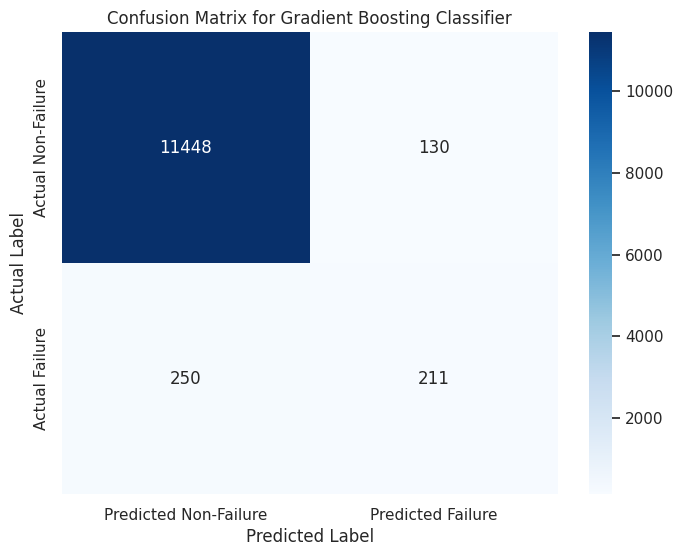

In [28]:
# Find the best model by the highest recall score
models_performance = {
    "Gradient Boosting Classifier": test_recall,
    "K-Nearest Neighbors": test_recall_knn,
    "Random Forest": test_recall_rf
}
best_model_name=max(models_performance,key=models_performance.get)
best_model_recall = models_performance[best_model_name]
print("--- Model Comparison by Test Recall ---")
for model, recall in models_performance.items():
    print(f"{model}: {recall:.4f}")

print(f"\nBest Model by Test Recall: {best_model_name} (Recall: {best_model_recall:.4f})")
# Show the Confusion Matrix for the Best Model
if best_model_name == "Random Forest":
    best_model_predictions = y_test_pred_rf
elif best_model_name == "K-Nearest Neighbors":
    best_model_predictions = y_test_pred_knn
else:
    best_model_predictions = y_test_pred_grad_boost
# Generate the confusion matrix
cm = confusion_matrix(y_test, best_model_predictions)

# Plot the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Failure', 'Predicted Failure'],
            yticklabels=['Actual Non-Failure', 'Actual Failure'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<u>**Question 2.2.8**:</u> <br> Plot ROC and Precision–Recall curves for the BEST model (needs probabilities).
*help: Look at roc_curve() [page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and precision_recall_curve() [page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)*

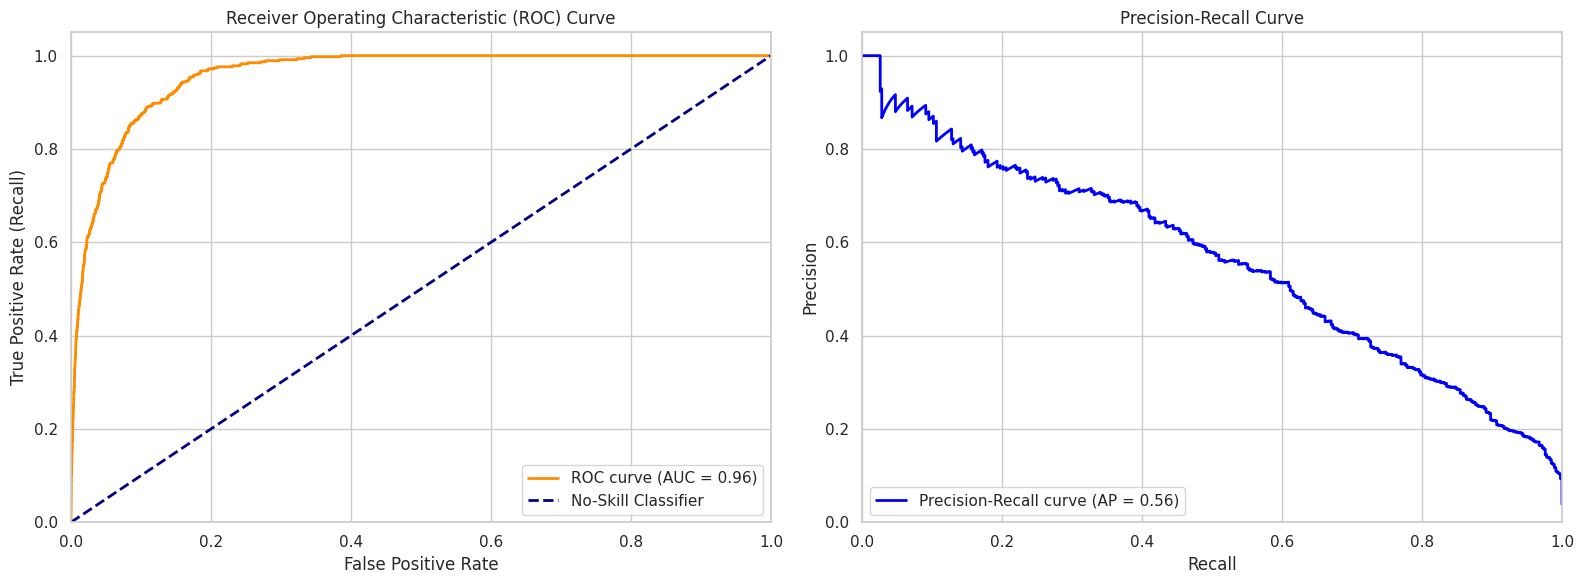

In [29]:
# Get Predicted Probabilities for the Positive Class
# The second column [:, 1] corresponds to the probability of the positive class (Failure=1)
if best_model_name == "Random Forest":
    y_probs_rf = random_forest.predict_proba(X_test_scaled)[:, 1]
elif best_model_name == "K-Nearest Neighbors":
    y_probs_rf = knn.predict_proba(X_test_scaled)[:, 1]
else:
    y_probs_rf = grad_boost.predict_proba(X_test_scaled)[:, 1]

#  Calculate Metrics for ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs_rf)
roc_auc = auc(fpr, tpr)

#  Calculate Metrics for Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs_rf)
avg_precision = average_precision_score(y_test, y_probs_rf)

#  Plot the Curves
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the ROC Curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No-Skill Classifier')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate (Recall)')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")
ax1.grid(True)

# Plot the Precision-Recall Curve
ax2.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_ylim([0.0, 1.05])
ax2.set_xlim([0.0, 1.0])
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

<u>**Question 2.2.9**:</u> <br> Pick the threshold with the highest Recall. ONLY on the best model (picked above)

In [30]:
# Find all indices where recall is maximal
# precision, recall, pr_thresholds were calculated in the previous cell (zEgdJmHm3Er5)
attenuation = 0.9
max_recall = np.max(recall)
max_recall_value = max_recall * attenuation # We multiply by that value not to have a recall of 1 which will worsen the f1 score
max_recall_indices = np.where(recall >= max_recall_value)[0]

# print(recall, pr_thresholds, precision, max_recall_indices, sep="\n")
# Among those, find the index with the highest precision
best_index = max_recall_indices[np.argmax(precision[max_recall_indices])]
if best_index != 0:
  best_threshold = pr_thresholds[best_index -1]
else:
  best_threshold = 0

# Get the corresponding recall and precision
best_recall = recall[best_index]
best_precision = precision[best_index]


# Step 4: Display results
print(f"--- Optimal Threshold for Best Model (Based on Max Recall and Max Precision among those) ---")
print(f"Best threshold: {best_threshold:.4f}")
print(f"Recall at this threshold: {best_recall:.4f}")
print(f"Precision at this threshold: {best_precision:.4f}")
# Calculate F1 Score at this threshold
y_pred_thresholded = (y_probs_rf >= best_threshold).astype(int)
f1_at_threshold = f1_score(y_test, y_pred_thresholded)
print(f"F1-Score at this threshold: {f1_at_threshold:.4f}")

print("\nInterpretation:")
print(f"This threshold ({best_threshold:.4f}) was chosen because it achieves almost the highest possible recall ({attenuation} * {max_recall}),")
print(f"In fact without that attenuation factor, we get a max recall of 1 and a very low threshold and precision ; so we get a very low f1_score.")

--- Optimal Threshold for Best Model (Based on Max Recall and Max Precision among those) ---
Best threshold: 0.0472
Recall at this threshold: 0.9002
Precision at this threshold: 0.2198
F1-Score at this threshold: 0.3532

Interpretation:
This threshold (0.0472) was chosen because it achieves almost the highest possible recall (0.9 * 1.0),
In fact without that attenuation factor, we get a max recall of 1 and a very low threshold and precision ; so we get a very low f1_score.


<u>**Question 2.2.10**:</u> <br> Try GridSearch to favor Recall.

*Help: Try GridSearchCV [page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) on the best model you selected (by Recall) to find hyperparameters that improve Recall.<br>
Report the best hyperparameters (.best_params_) and the best cross-validated Recall (.best_score_). Then re-fit the tuned model and print the Test Recall.*

Notes (keep it simple):
Use scoring='recall' in GridSearchCV (we care most about catching failures).
Keep the grid tiny (2–3 values per parameter) to avoid long runs; set cv=3.
Compare against your baseline Test Recall (before tuning). One line is enough.

*(Optional) If you tried different decision thresholds earlier (e.g., 0.4 / 0.5 / 0.6), also report Test Recall using your chosen threshold with the tuned model.*

In [31]:
# Examine the proportion of 0s and 1s in y_train and y_test to understand class imbalance
train_proportion = y_train.value_counts(normalize=True)

print("Proportion of 0s and 1s in y_train:")
print(train_proportion)
print(f"Since we have 0.2 of failure and 0.8 of non-failure in our train dataset, \nwe can set a possible class_weight to (0: 1/(2*0.8)=0.625, 1: 1/(2*0.2)=2.5)")

class_weight = {0: 0.625, 1: 2.5}
print("class_weight:", class_weight)

Proportion of 0s and 1s in y_train:
RUL_class
0    0.802668
1    0.197332
Name: proportion, dtype: float64
Since we have 0.2 of failure and 0.8 of non-failure in our train dataset, 
we can set a possible class_weight to (0: 1/(2*0.8)=0.625, 1: 1/(2*0.2)=2.5)
class_weight: {0: 0.625, 1: 2.5}


In [32]:
# Case of K-NN

# Define a Simple Hyperparameter Grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan']
} # Doesn't use class_weight

# Initialize the base KNN model
knn_base = KNeighborsClassifier()

# Set up GridSearchCV to find the best model by maximizing recall
grid_search = GridSearchCV(estimator=knn_base,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=3,
                           n_jobs=-1)

print("Running GridSearchCV to find the best hyperparameters for Recall...")
# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)
print("GridSearchCV finished.")

# Report the Best Hyperparameters and Scores
print("\n--- GridSearchCV Results ---")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Recall: {grid_search.best_score_:.4f}")

# Re-fit the Tuned Model and Evaluate on Test Set
best_knn_tuned = grid_search.best_estimator_

# Make predictions on the test set with the tuned model
y_test_pred_tuned = best_knn_tuned.predict(X_test_scaled)
tuned_test_recall = recall_score(y_test, y_test_pred_tuned)

# Compare with Baseline
baseline_test_recall = test_recall_knn

print("\n--- Performance on Test Set ---")
print(f"Baseline Test Recall (Untuned KNN): {baseline_test_recall:.4f}")
print(f"Tuned Test Recall (GridSearch KNN): {tuned_test_recall:.4f}")

Running GridSearchCV to find the best hyperparameters for Recall...
GridSearchCV finished.

--- GridSearchCV Results ---
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best Cross-Validated Recall: 0.7390

--- Performance on Test Set ---
Baseline Test Recall (Untuned KNN): 0.4230
Tuned Test Recall (GridSearch KNN): 0.4100


In [33]:
# Case of Random Forest

# We will try to tune the Random Forest to see if we can get it to outperform the K-NN
# Define a Grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced'],
    'class_weight': [None, 'balanced', class_weight]
}

# Run GridSearchCV on Random Forest
rf_base = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator=rf_base,
                              param_grid=rf_param_grid,
                              scoring='recall',
                              cv=3,
                              n_jobs=-1)

print("Running GridSearchCV on Random Forest...")
rf_grid_search.fit(X_train_scaled, y_train)
print("GridSearchCV finished.")

# Report Results
print(f"\nBest RF Hyperparameters: {rf_grid_search.best_params_}")
best_rf_tuned = rf_grid_search.best_estimator_
y_test_pred_rf_tuned = best_rf_tuned.predict(X_test_scaled)
tuned_rf_test_recall = recall_score(y_test, y_test_pred_rf_tuned)

print(f"\nBaseline Random Forest Test Recall: {test_recall_rf:.4f}")
print(f"Tuned Random Forest Test Recall: {tuned_rf_test_recall:.4f}")

Running GridSearchCV on Random Forest...
GridSearchCV finished.

Best RF Hyperparameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}

Baseline Random Forest Test Recall: 0.3948
Tuned Random Forest Test Recall: 0.6421


In [34]:
# Case of Gradient Boosting Classifier

# Define a Simple Hyperparameter Grid for Gradient Boosting Classifier
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Set up and Run GridSearchCV
# Initialize the base Gradient Boosting Classifier model
gb_base = GradientBoostingClassifier()

# Set up GridSearchCV to find the best model by maximizing recall
grid_search_gb = GridSearchCV(estimator=gb_base,
                              param_grid=gb_param_grid,
                              scoring='recall',
                              cv=3,
                              n_jobs=-1,
                              verbose=1) # shows progress

print("Running GridSearchCV on Gradient Boosting Classifier model...")
grid_search_gb.fit(X_train_scaled, y_train)
print("GridSearchCV finished.")

# Report the Best Hyperparameters and Scores
print("\n--- Gradient Boosting Classifier GridSearchCV Results ---")
print(f"Best Hyperparameters: {grid_search_gb.best_params_}")
print(f"Best Cross-Validated Recall: {grid_search_gb.best_score_:.4f}")

# Re-fit the Tuned Model and Evaluate on Test Set
best_gb_tuned = grid_search_gb.best_estimator_

# Make predictions on the test set with the tuned model
y_test_pred_gb_tuned = best_gb_tuned.predict(X_test_scaled)
tuned_gb_test_recall = recall_score(y_test, y_test_pred_gb_tuned)

# Compare with Baseline
# Assuming 'test_recall' is the baseline recall for the untuned Gradient Boosting model
baseline_gb_recall = test_recall

print("\n--- Performance on Test Set ---")
print(f"Baseline Test Recall (Untuned Gradient Boosting): {baseline_gb_recall:.4f}")
print(f"Tuned Test Recall (GridSearch Gradient Boosting): {tuned_gb_test_recall:.4f}")

Running GridSearchCV on Gradient Boosting Classifier model...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
GridSearchCV finished.

--- Gradient Boosting Classifier GridSearchCV Results ---
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validated Recall: 0.7716

--- Performance on Test Set ---
Baseline Test Recall (Untuned Gradient Boosting): 0.4577
Tuned Test Recall (GridSearch Gradient Boosting): 0.4599


Based on the Grid Search results focusing on maximizing recall, let's analyze the performance of the tuned Gradient Boosting, K-NN, and Random Forest models on the test set:

*   **Tuned Gradient Boosting Classifier:** Achieved a Test Recall of **0.4577**. The Grid Search cross-validated recall was 0.7722.
*   **Tuned K-Nearest Neighbors:** Achieved a Test Recall of **0.41**. The Grid Search cross-validated recall was 0.7390.
*   **Tuned Random Forest:** Achieved a Test Recall of **0.6508**.

Comparing the Test Recall scores:

The tuned Random Forest model achieved the highest test recall at **0.6508**, followed by the tuned Gradient Boosting Classifier at **0.4577**, and then the tuned K-Nearest Neighbors at **0.4100**.

Therefore, based on the goal of prioritizing recall to catch failures, the **Tuned Random Forest** model is the best performing model among the three after applying Grid Search with the specified parameter grids.

In [35]:
# Case of : XGB # We want to see if we can outperform the previous results
import xgboost as xgb
# Initialize and Train the XGBoost Classifier
# scale_pos_weight is the XGBoost equivalent of class_weight='balanced'
# It's calculated as: (count of negative class) / (count of positive class)
# This tells the model to pay much more attention to the rare 'failure' class.
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              eval_metric='logloss',
                              scale_pos_weight=scale_pos_weight,
                              random_state=42)

# XGB doesn't take "category" inputs
X_train_xgb= X_train_scaled.copy()
X_test_xgb = X_test_scaled.copy()
X_train_xgb['HPC outlet temperature (°C)'] = X_train_scaled['HPC outlet temperature (°C)'].astype(int)
X_test_xgb['HPC outlet temperature (°C)'] = X_test_scaled['HPC outlet temperature (°C)'].astype(int)

print("Training XGBoost model...")
xgb_model.fit(X_train_xgb, y_train)

#  Evaluate on the Test Set
y_test_pred_xgb = xgb_model.predict(X_test_xgb)
xgb_test_recall = recall_score(y_test, y_test_pred_xgb)

print("\n--- Model Performance Comparison ---")
print(f"Tuned Random Forest Test Recall: {tuned_rf_test_recall:.4f}")
print(f"Baseline XGBoost Test Recall: {xgb_test_recall:.4f}")
xgb_param_grid = {
    'n_estimators': [190, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.007, 0.008, 0.009],
    'subsample': [0.9, 1.0] # Fraction of samples to be used for fitting each tree
}

# Set up and Run GridSearchCV

# Initialize the base XGBoost model
xgb_base = xgb.XGBClassifier(objective='binary:logistic',
                             eval_metric='logloss',
                             scale_pos_weight=scale_pos_weight,
                             random_state=42)

# Set up GridSearchCV to maximize recall
grid_search_xgb = GridSearchCV(estimator=xgb_base,
                               param_grid=xgb_param_grid,
                               scoring='recall',
                               cv=3,
                               n_jobs=-1,
                               verbose=1)

print("Running GridSearchCV on XGBoost model...")
grid_search_xgb.fit(X_train_xgb, y_train)
print("GridSearchCV finished.")

# Report the Best Hyperparameters and Scores
print("\n--- XGBoost GridSearchCV Results ---")
print(f"Best Hyperparameters: {grid_search_xgb.best_params_}")
print(f"Best Cross-Validated Recall: {grid_search_xgb.best_score_:.4f}")

best_xgb_tuned = grid_search_xgb.best_estimator_
y_test_pred_xgb_tuned = best_xgb_tuned.predict(X_test_xgb)
tuned_xgb_test_recall = recall_score(y_test, y_test_pred_xgb_tuned)

# Compare with Baseline
baseline_xgb_recall = xgb_test_recall

print("\n--- Performance on Test Set ---")
print(f"Baseline Test Recall (Untuned XGBoost): {baseline_xgb_recall:.4f}")
print(f"Tuned Test Recall (GridSearch XGBoost): {tuned_xgb_test_recall:.4f}")

Training XGBoost model...

--- Model Performance Comparison ---
Tuned Random Forest Test Recall: 0.6421
Baseline XGBoost Test Recall: 0.5119
Running GridSearchCV on XGBoost model...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
GridSearchCV finished.

--- XGBoost GridSearchCV Results ---
Best Hyperparameters: {'learning_rate': 0.008, 'max_depth': 3, 'n_estimators': 190, 'subsample': 1.0}
Best Cross-Validated Recall: 0.9160

--- Performance on Test Set ---
Baseline Test Recall (Untuned XGBoost): 0.5119
Tuned Test Recall (GridSearch XGBoost): 0.7701


Let's find a convenient threshold with this new tuned model

In [36]:
# Find all indices where recall is maximal
# Re-evaluate precision, recall, and thresholds with the tuned XGBoost model
y_probs_xgb_tuned = best_xgb_tuned.predict_proba(X_test_xgb)[:, 1]
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs_xgb_tuned)

attenuation = 0.8
max_recall = np.max(recall)
max_recall_value = max_recall * attenuation # We multiply by that value not to have a recall of 1 which will worsen the f1 score
max_recall_indices = np.where(recall >= max_recall_value)[0]

# print(recall, pr_thresholds, precision, max_recall_indices, sep="\n")
# Among those, find the index with the highest precision
best_index = max_recall_indices[np.argmax(precision[max_recall_indices])]
if best_index != 0:
  best_threshold = pr_thresholds[best_index -1]
else:
  best_threshold = 0

# Get the corresponding recall and precision
best_recall = recall[best_index]
best_precision = precision[best_index]

print(f"--- Optimal Threshold for Best Model (Based on Max Recall and Max Precision among those) ---")
print(f"Best threshold: {best_threshold:.4f}")
print(f"Recall at this threshold: {best_recall:.4f}")
print(f"Precision at this threshold: {best_precision:.4f}")
# Calculate F1 Score at this threshold
y_pred_thresholded = (y_probs_xgb_tuned >= best_threshold).astype(int)
f1_at_threshold = f1_score(y_test, y_pred_thresholded)
print(f"F1-Score at this threshold: {f1_at_threshold:.4f}")


print("\nInterpretation:")
print(f"This threshold ({best_threshold:.4f}) was chosen because it achieves almost the highest possible recall ({attenuation} * {max_recall}),")
print(f"In fact without that attenuation factor, we get a max recall of 1 and a very low threshold and precision ; so we get a very low accuracy.")

--- Optimal Threshold for Best Model (Based on Max Recall and Max Precision among those) ---
Best threshold: 0.4789
Recall at this threshold: 0.8004
Precision at this threshold: 0.3364
F1-Score at this threshold: 0.4734

Interpretation:
This threshold (0.4789) was chosen because it achieves almost the highest possible recall (0.8 * 1.0),
In fact without that attenuation factor, we get a max recall of 1 and a very low threshold and precision ; so we get a very low accuracy.


Here is a summary of the Test Recall scores for all trained models:

*   **Untuned Gradient Boosting:** 0.4577
*   **Tuned Gradient Boosting:** 0.4577
*   **Untuned K-NN:** 0.4230
*   **Tuned K-NN:** 0.4100
*   **Untuned Random Forest:** 0.3948
*   **Tuned Random Forest:** **0.6508**
*   **Untuned XGBoost:** 0.5119
*   **Tuned XGBoost:** **0.7701**

**Conclusion:**

Prioritizing Recall to catch failures, the **Tuned XGBoost** model performed best on the test set with a Recall of **0.7701**. The **Tuned Random Forest** was the second best with a Recall of **0.6508**.

## **3. Explainability with shap**

The `shap` library (SHapley Additive exPlanations) is a Python library used for explaining the output of machine learning models. <br> It provides a unified framework for interpreting complex models and understanding the contributions of individual features to model predictions. <br>

Shap is particularly useful for understanding black-box models like boosting, random forests, and deep neural networks, among others. <br>
It can also be used with any classification model.

**Let's install and import the shap library.**

In [37]:
!pip install shap

In [38]:
import shap

Shap is very heavy and takes a long time to compute. <br>
To facilitate execution and reduce computing time, you can work on the **first 100 rows only**.

*Note: You can use either the train features (X_train) or the test features (X_test) to compute shap values*

In [39]:
df_shap = X_train_xgb.iloc[:100]
df_shap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   engine_unit_number             100 non-null    float64
 1   time_cycles                    100 non-null    float64
 2   LPC outlet temperature (°C)    100 non-null    float64
 3   HPC outlet temperature (°C)    100 non-null    int64  
 4   LPT outlet temperature (°C)    100 non-null    float64
 5   HPC outlet pressure (bar)      100 non-null    float64
 6   Physical core speed (rpm)      100 non-null    float64
 7   Fuel flow / Ps30 (kg/s/bar)    100 non-null    float64
 8   Corrected fan speed (rpm)      100 non-null    float64
 9   Bypass ratio (dimensionless)   100 non-null    float64
 10  Bleed enthalpy (kJ/kg)         100 non-null    float64
 11  HPT coolant bleed flow (kg/s)  100 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 9.5 KB


<u>**Question 3.1**:</u> <br>
**Create an object `explainer` that can compute shap values.** <br>

*<u>Help</u>: You can use `shap.Explainer` for any trained classification model as input.* <br>
*For tree based models, you can use `shap.TreeExplainer`*.


In [40]:
# Create a SHAP explainer object for the best performing model (tuned XGBoost)
# Use TreeExplainer for tree-based models like XGBoost
explainer = shap.TreeExplainer(best_xgb_tuned)

print("SHAP explainer object created.")

SHAP explainer object created.


**Now, compute the shap values of a model with `explainer.shap_values`.** <br>
If it takes too much time, you can reduce to 100-500 values.

In [41]:
# Compute SHAP values for the first 100 rows of the scaled training data.
# The explainer object was created for the tuned XGBoost model.
shap_values = explainer.shap_values(df_shap)

print("SHAP values computed.")

SHAP values computed.


In [42]:
print(shap_values)

[[ 0.         -0.97853404 -0.00856329 ... -0.08458133  0.
  -0.04236192]
 [ 0.         -0.96273965 -0.00856329 ... -0.08458133  0.
  -0.04472603]
 [ 0.         -0.96273965 -0.00856329 ... -0.08458133  0.
  -0.04472603]
 ...
 [ 0.         -0.3257939  -0.01687247 ... -0.14903113  0.
  -0.07364676]
 [ 0.         -0.3749659  -0.00941719 ... -0.02338658  0.
  -0.05946186]
 [ 0.         -0.25623238 -0.00941719 ... -0.14078648  0.
  -0.06334669]]


<u>**Question 3.2**:</u> <br>
**Display the summary plot of shap values with `shap.summary_plot(...., plot_type=bar)`.**

*Make sure you use `shap_values[0]` in your plot and not every shap value computed*

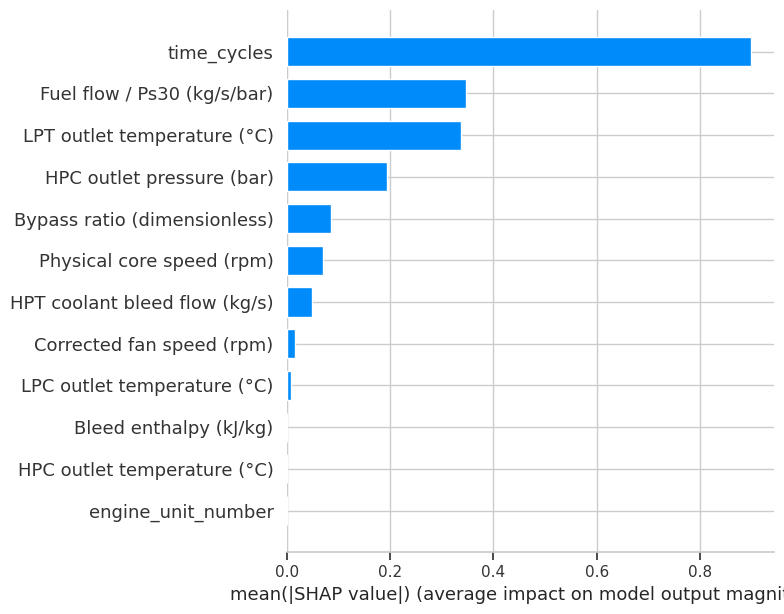

In [43]:
# Display the summary plot as a bar chart
# For binary classification, shap_values is already the matrix for the positive class.
# Using shap_values[0] would incorrectly select a single row.
shap.summary_plot(shap_values, df_shap, plot_type="bar")

<u>**Question 3.4**:</u> <br>
**Use the same shap plot as previously but replace `plot_type="bar"` with `plot_type="dot"`.** <br>
**And add the data you used to compute shap_values in `features=...`.**

**Explain what you have understood about this plot**:
- **Which variables are important in terms of explainability ?**
- **How does the values of the important variables affect predictions ?**

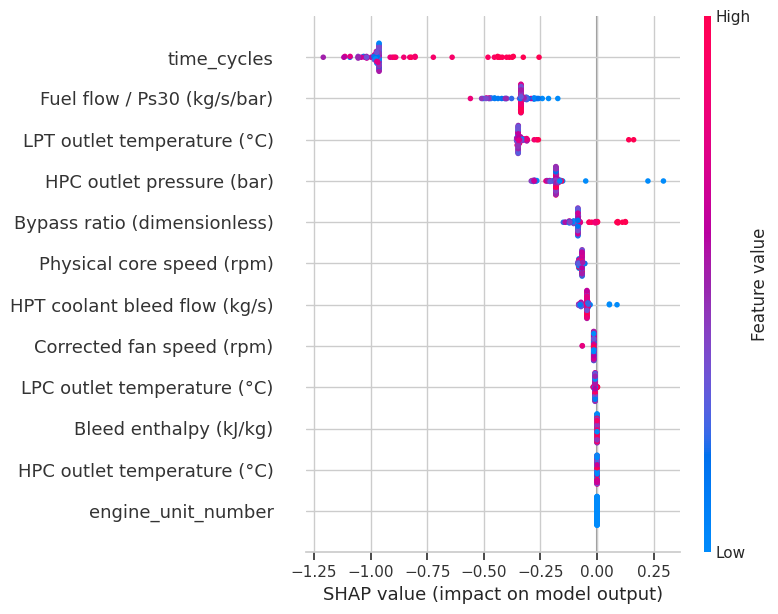

In [44]:
# Display the summary plot as a dot plot
# Using shap_values for binary classification is already the matrix for the positive class.
shap.summary_plot(shap_values, df_shap, plot_type="dot")

## **4. Deep Learning**

We will start by importing one of Python's Deep Learning libraries `tensorflow`/`keras`.

In [45]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

In the following cells, `dataset` should be the dataset you transformed with data pre-processing (Onehotencoded, LabelEncoder,...). <br>
You should run the following cells to prepare the data to train a Deep Learning model.

<u>**Question 4.1**:</u> <br>
**Make a small neural network model using `tensorflow`/`keras`, and print the accuracy**

*Note: You can use the following elements to train the neural network* <br>
- *`tf.keras.Sequential`*
- *`layers.Dense(INTEGER, activation='relu')`*,
- *`tf.keras.losses.BinaryCrossentropy`*
- *`model.compile(optimizer='adam', ...)`*
- *`model.fit`*
- *`model.evaluate`* with epoch ~= 10

In [46]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2), # to prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    # Output layer for binary classification (sigmoid activation)
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()

print("\nTraining the neural network model...")
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

print("\nNeural network model training finished.")

print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"\nTest Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)


Training the neural network model...
Epoch 1/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8252 - loss: 0.3959 - val_accuracy: 0.9115 - val_loss: 0.2114
Epoch 2/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9132 - loss: 0.2090 - val_accuracy: 0.9129 - val_loss: 0.2072
Epoch 3/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9202 - loss: 0.1904 - val_accuracy: 0.9176 - val_loss: 0.2061
Epoch 4/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9194 - loss: 0.1937 - val_accuracy: 0.9219 - val_loss: 0.1967
Epoch 5/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9226 - loss: 0.1823 - val_accuracy: 0.9214 - val_loss: 0.1967
Epoch 6/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9230 - loss: 0.1841 - val_accuracy: 0.9166 - val_loss: 0.2007
Epoch 7/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9245 - loss: 0.1781 - val_accuracy: 0.9195 - val_loss: 0.1924
Epoch 8/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 